d: 1666.8718531633228 theta_i: 0.2715475793333662
Error =  0.007687272746080416 %


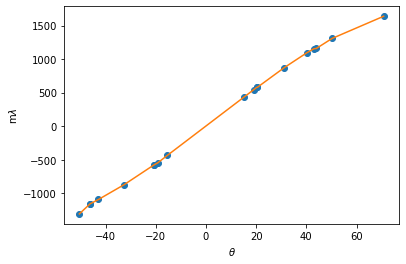

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit

#LAMBDA VALUES:

f = lambda x,d,theta_i: d*(np.sin(np.deg2rad(x+theta_i))+np.sin(np.deg2rad(theta_i)))

deg = [15.242, -15.383, 31.175, -32.583, 50.267, -50.441, 19.125, -19.183, 40.125, -42.792, 70.8, 20.167, 
       -20.667, 42.992, -45.983, 20.492, -20.775, 43.975, -46.167]

wavelengths = [435.833, -435.833, 435.833*2, -435.833*2, 435.833*3, -435.833*3, 546.074, -546.074, 
               546.074*2, -546.074*2, 546.074*3, 576.960, -576.960, 576.960*2, -576.960*2, 579.066, -579.066, 579.066*2, -579.066*2]

#print(wavelengths)

deg.sort()
wavelengths.sort()

params, extras = curve_fit(f, deg, wavelengths, p0=[1666.67, 0.1])
plt.axes()
plt.plot(deg, wavelengths, 'o')
plt.plot(deg, wavelengths)
plt.xlabel(r'$\theta$')
plt.ylabel(r'm$\lambda$')
#plt.plot(deg, f(deg, params[0], params[1]), 'o')

d = params[0]

theta_i = params[1]

print("d:", params[0],"theta_i:", params[1])

err = (1667-d)/1667
print("Error = ", err*100, "%")

Rydberg's constant calculated: 1.075650e+07 Accepted Value: 1.097370e+07
Error = 1.9792521424136713 %


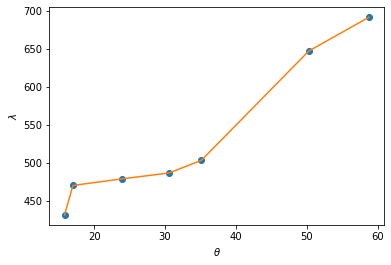

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit

#LAMBDA VALUES:

g = lambda x: d*(np.sin(np.deg2rad(x+theta_i))+np.sin(np.deg2rad(theta_i)))

degs = [15.83, 17.02, 23.95, 30.58, 35.12, 50.25, 58.72]

wavelength = [g(x) for x in degs]
wavelength[3] = wavelength[3]/2
wavelength[4] = wavelength[4]/2
wavelength[5] = wavelength[5]/2
wavelength[6] = wavelength[6]/3

wavelengths = [x for x in wavelength]
wavelengths.sort()

plt.axes()
plt.plot(degs, wavelengths, 'o')
plt.plot(degs, wavelengths)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\lambda$')
#plt.plot(deg, f(deg, params[0], params[1]), 'o')

b = lambda x,R: R*((1/4)-(1/(x**2)))

n_values = [5, 4, 3, 5, 4, 3, 4]

balmer_wavelength = [1/(x*10**-9) for x in wavelength]

R_cons = 1.09737*10**7

params, extras = curve_fit(b, n_values, balmer_wavelength, p0=R_cons)

err = (R_cons-params[0])/R_cons

print("Rydberg's constant calculated:", "{:e}".format(params[0]), "Accepted Value:", "{:e}".format(R_cons))

print("Error =", err*100, "%")